# DBSCAN  


It is by far the most popular density-based clustering algorithm with plenty of citations on Google Scholar.
It uses two important hyperparameters:
- Epsilon (ε): It is the maximum distance between two points to be considered as part of the same
neighborhood or dense region.
- minPoints: It is the minimum number of points necessary to form a dense cluster (including the
central point).
The central idea is to divide the observations into 3 groups of points:
1. Core points: There are more than minPoints points in the ε-neighborhood.
2. Boundary points: Fewer than minPoints within ε but close to a core point.
3. Noise or Outlier points: All remaining points: Not a core point, and not close enough to be reachable
from a core point.  
  
The algorithm is particularly valid since it can determine arbitrarily or complex shaped clusters. It is also less sensitivity to outliers than others and can be used for their detection. Also, it works effectively with any size of datasets.  
  
On the other hand, it does not scale well for a high-dimensional dataset, it shows some Problems in finding clusters of different densities and it works only with metric variables. It is widely used in anomaly detection, spatial analysis, scientific literature, and others.

---

You’re analyzing GPS data from vehicles moving in a city and want to group vehicles into areas of high activity (clusters) while ignoring sparsely active areas (noise).

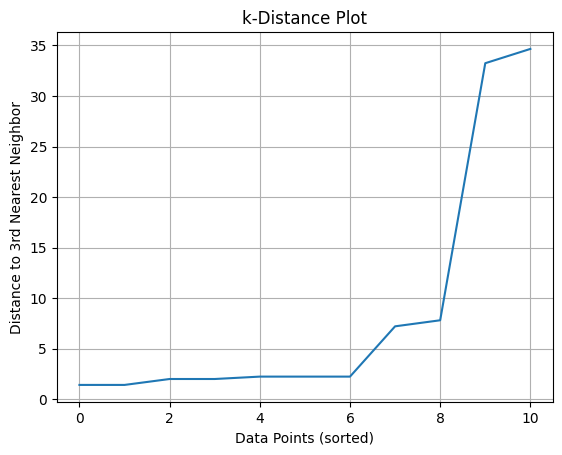

In [28]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K-Distance Plot to find EPS
data = pd.DataFrame({
    "X": [1, 2, 2, 8, 8, 25, 26, 25, 24, 50, 49],
    "Y": [1, 2, 3, 8, 7, 25, 24, 26, 24, 50, 49]
})

# Compute the distances to the 3rd nearest neighbor (min_samples = 3)
neighbors = NearestNeighbors(n_neighbors=3)  # min_samples=3
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

# Sort the distances and plot
distances = np.sort(distances[:, 2])  # 2 because min_samples=3-1 (3rd nearest neighbor)
plt.plot(distances)
plt.title("k-Distance Plot")
plt.xlabel("Data Points (sorted)")
plt.ylabel("Distance to 3rd Nearest Neighbor")
plt.grid(True)
plt.show()

In [29]:
# Optional to find exact EPS
from kneed import KneeLocator

# Compute distances to the 3rd nearest neighbor
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances[:, 2])  # 3rd nearest neighbor

# Find the elbow point
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
print(f"Recommended eps (elbow): {distances[knee.knee]}")

Recommended eps (elbow): 2.23606797749979


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the dataset
data = pd.DataFrame({
    "X": [1, 2, 2, 8, 8, 25, 26, 25, 24, 50, 49],
    "Y": [1, 2, 3, 8, 7, 25, 24, 26, 24, 50, 49]
})

data.head()

,X,Y
0,1,1
1,2,2
2,2,3
3,8,8
4,8,7


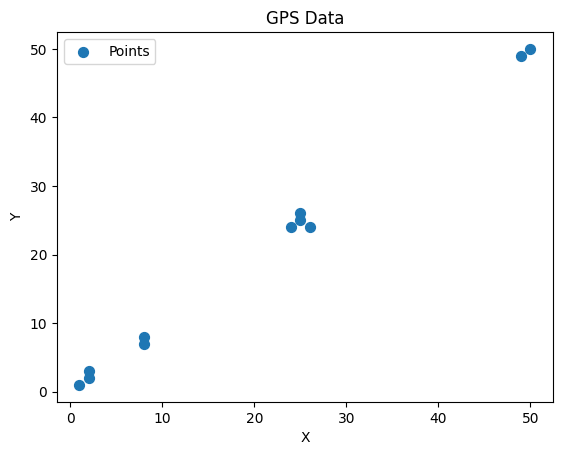

In [31]:
# Visualize the data
plt.scatter(data['X'], data['Y'], label = 'Points', s = 50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GPS Data')
plt.legend()
plt.show()

In [37]:
# Apply DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 3)
data['Cluster'] = dbscan.fit_predict(data)
data.head()

,X,Y,Cluster
0,1,1,0
1,2,2,0
2,2,3,0
3,8,8,-1
4,8,7,-1


The process begins by randomly selecting a point that hasn't been assigned to a cluster yet. The algorithm then determines whether it is a core point or an outlier. When a core point is found, all the points that are density-reachable from it are added to the cluster.

Next, the algorithm performs neighbour jumps to each directly reachable point and adds them to the cluster. If an outlier is added, it will be labelled as a boundary point. 

The algorithm then selects another core point and repeats the previous steps until all points are either assigned to a cluster or labelled as outliers.

---

In [38]:
# Identify what is considered noise (-1)
noise = data[data['Cluster'] == -1]
clusters = data[data['Cluster'] != -1]

noise, clusters

(     X   Y  Cluster
 3    8   8       -1
 4    8   7       -1
 9   50  50       -1
 10  49  49       -1,
     X   Y  Cluster
 0   1   1        0
 1   2   2        0
 2   2   3        0
 5  25  25        1
 6  26  24        1
 7  25  26        1
 8  24  24        1)

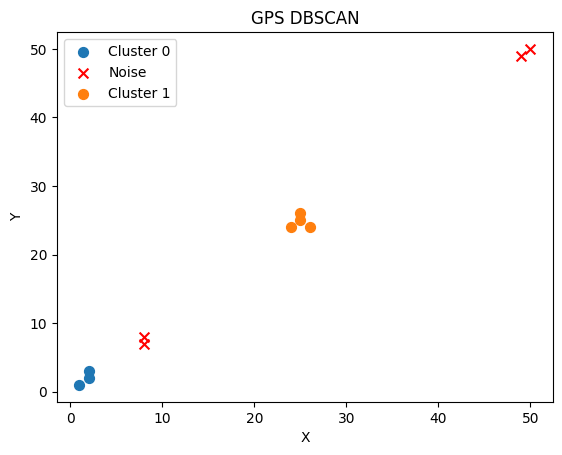

In [43]:
# Visualize the clusters
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    marker = 'x' if cluster == -1 else 'o'
    c = 'red' if cluster == -1 else None
    plt.scatter(cluster_data['X'], cluster_data['Y'], label = label, s = 50, marker = marker, c = c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('GPS DBSCAN')
plt.legend()
plt.show()

# Metrics

Range:  
-1: Poor clustering (points assigned to wrong clusters).  
0: Overlapping clusters.  
1: Perfect clustering.  

In [44]:
# Silhouette Score
from sklearn.metrics import silhouette_score

# Compute Silhouette Score (ignore noise points: Cluster = -1)
filtered_data = data[data['Cluster'] != -1]
score = silhouette_score(
    filtered_data[["X", "Y"]],
    filtered_data["Cluster"]
)
print(f"Silhouette Score: {score}")
print('Good' if score > 0 and score <= 1 else 'Bad') 

Silhouette Score: 0.9495190426629782
Good


Generally, the higher the value, the better the solution. You can determine if it's good or not by eye

In [45]:
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index (ignore noise points: Cluster = -1)
filtered_data = data[data['Cluster'] != -1]
score = calinski_harabasz_score(
    filtered_data[["X", "Y"]],
    filtered_data["Cluster"]
)
print(f"Calinski-Harabasz Index: {score}")

Calinski-Harabasz Index: 1227.359550561798
